# Deep learning Practical Assignment 3 : CNN
<ul>
<li><strong>Members :</strong> Belkacem Mohamed Ghaith & Rachico Mehdi </li>
<li><strong>Objective : </strong>Create a CNN-based model & train different models on different datasets</li>
</ul>

#  Libraries used

In [1]:
!pip install tensorflow==2.7.0
!pip install numpy==1.19.5
!pip install scikit-learn==1.0.1 
!pip install matplotlib==3.2.2 
!pip install keras==2.7.0 

In [17]:
from keras.models import Sequential
from sklearn.datasets import load_digits
import keras
from keras.utils import np_utils
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten, Dense, Dropout, Activation,  GlobalAveragePooling2D, ZeroPadding2D
# from keras.layers.normalization import BatchNormalization
from keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
import tensorflow as tf
import numpy as np
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn import datasets
from sklearn.metrics import precision_score
from keras.layers import Dense
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model

# Loading the **Datasets**

In [4]:
digits = load_digits()
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [3]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
train_labels = to_categorical(y_train, num_classes=digits.target_names.shape[0])
test_labels = to_categorical(y_test, num_classes=digits.target_names.shape[0])

In [8]:
y_train.shape

(1437,)

# Fully connected Model for the **Digits Dataset**

In [10]:
model = Sequential()
model.add(Dense(16 , input_dim =X_train.shape[1], activation ='relu'))
model.add(Dense(8 , activation ='relu'))
model.add(Dense(digits.target_names.shape[0], activation ='softmax'))
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics =['accuracy'])
model.fit (X_train, train_labels, epochs=50, batch_size=10)
y_pred = model.predict(X_test)
y_predicted = []
for pred in y_pred :
  y_predicted.append(list(pred).index(max(pred)))
print("accuracy = " , accuracy_score(y_predicted, y_test))

Epoch 1/50
144/144 [==============================] - 2s 3ms/step - loss: 0.7514 - accuracy: 0.1858
Epoch 2/50
144/144 [==============================] - 0s 3ms/step - loss: 0.2790 - accuracy: 0.4064
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.2245 - accuracy: 0.5678
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.6959
Epoch 5/50
144/144 [==============================] - 0s 3ms/step - loss: 0.1656 - accuracy: 0.7676
Epoch 6/50
144/144 [==============================] - 0s 3ms/step - loss: 0.1480 - accuracy: 0.8003
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.8483
Epoch 8/50
144/144 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.8580
Epoch 9/50
144/144 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.8810
Epoch 10/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.9026

# Fully connected Model for the **Faces Dataset**

In [5]:
X = faces.data
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
train_labels = to_categorical(y_train, 40)
test_labels = to_categorical(y_test, 40)

In [6]:
model = Sequential()
model.add(Dense(16 , input_dim =X_train.shape[1], activation ='relu'))
model.add(Dense(8 , activation ='relu'))
model.add(Dense(40, activation ='softmax'))
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics =['accuracy'])
model.fit (X_train, train_labels, epochs=50, batch_size=10)
y_pred = model.predict(X_test)
y_predicted = []
for pred in y_pred :
  y_predicted.append(list(pred).index(max(pred)))
print("accuracy = " , accuracy_score(y_predicted, y_test))

Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.6580 - accuracy: 0.0375
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.5476 - accuracy: 0.0281
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.3884 - accuracy: 0.0250
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.2537 - accuracy: 0.0281
Epoch 5/50
32/32 [==============================] - 0s 5ms/step - loss: 0.1773 - accuracy: 0.0281
Epoch 6/50
32/32 [==============================] - 0s 5ms/step - loss: 0.1445 - accuracy: 0.0281
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1322 - accuracy: 0.0281
Epoch 8/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1263 - accuracy: 0.0281
Epoch 9/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1229 - accuracy: 0.0281
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1211 - accuracy: 0.0312
Epoch 11/50
32/32 [

👉 The accuracy score is low and this is beacause the number of classes is relatively high compared to the number of instances and thus not all the data classes are trained in the model

# **ResNet152v2** Model for the faces dataset

In [80]:
from tensorflow import keras

X = faces['images']
x = keras.applications.resnet_v2.preprocess_input(tf.cast(X, tf.float32))
y = faces['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
train_labels = to_categorical(y_train, num_classes=40)
test_labels = to_categorical(y_test, num_classes=40)
x = tf.image.grayscale_to_rgb(tf.constant(X_train))

model = keras.Sequential()
base_model = keras.applications.ResNet152V2(
  include_top=False,
  weights='imagenet',
  input_shape=(64, 64, 3)
)
for layer in base_model.layers[:-2]:
  layer.trainable = False
  data_augmentation = tf.keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
])
model.add(data_augmentation)
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(40, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.001)))

In [81]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential_3840"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4402 (Sequential  (None, 64, 64, 3)        0         
 )                                                               
                                                                 
 resnet152v2 (Functional)    (None, 2, 2, 2048)        58331648  
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_11 (Dense)            (None, 40)                327720    
                                                                 
Total params: 58,659,368
Trainable params: 331,816
Non-trainable params: 58,327,552
_________________________________________________________________


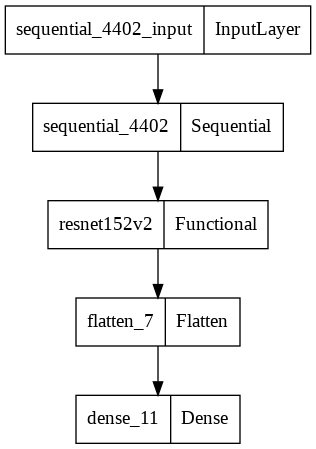

In [84]:
plot_model(model)

In [86]:
history = model.fit(x, train_labels, validation_split=0.2, batch_size=25, epochs=10)

Epoch 1/10
11/11 [==============================] - 11s 1s/step - loss: 0.9222 - accuracy: 0.7812 - val_loss: 2.1729 - val_accuracy: 0.5781
Epoch 2/10
11/11 [==============================] - 11s 1s/step - loss: 0.9718 - accuracy: 0.7773 - val_loss: 1.9194 - val_accuracy: 0.5938
Epoch 3/10
11/11 [==============================] - 11s 1s/step - loss: 0.7627 - accuracy: 0.8164 - val_loss: 2.2670 - val_accuracy: 0.5781
Epoch 4/10
11/11 [==============================] - 11s 1s/step - loss: 0.9406 - accuracy: 0.8047 - val_loss: 2.2570 - val_accuracy: 0.5938
Epoch 5/10
11/11 [==============================] - 11s 1s/step - loss: 0.7372 - accuracy: 0.8516 - val_loss: 1.6044 - val_accuracy: 0.6094
Epoch 6/10
11/11 [==============================] - 11s 998ms/step - loss: 0.7646 - accuracy: 0.8203 - val_loss: 1.4567 - val_accuracy: 0.7188
Epoch 7/10
11/11 [==============================] - 11s 1s/step - loss: 0.7024 - accuracy: 0.8477 - val_loss: 1.5429 - val_accuracy: 0.6406
Epoch 8/10
11/11 

In [89]:
x_test = tf.image.grayscale_to_rgb(tf.constant(X_test))

In [92]:
scores = model.evaluate(x_test, test_labels, verbose=0)
print("Accuracy Score =  %.2f%%" % (scores[1]*100))

Accuracy Score =  77.50%


👉 The accuracy score for the test set is quite high. The CNN model outperformed the Fully Connected Network. <br>
👉 Eventhough we didn't have enough data samples, our CNN model did great.